**Objective of this Project:**
Sentiment Analysis is one of the most used applications of data science in Real-World Analysis. As the whole world is dependent on Social Media, user opinion and explanation can help us to understand their sentiments and intentions.
The tweets have been annotated as (0 = negative, 4 = positive) and they can be used to detect sentiment our objective is to predict the labels on the given test dataset



**Dataset:**
We have extracted the data from the Kaggle that contains 1,600,000 tweets and have been annoted as (0 = negative, 4 = positive).

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative,4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

- target: the polarity of the tweet (0 = negative 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)


The official link regarding the dataset with resources about how it was generated is here
The official paper detailing the approach is here

According to the creators of the dataset:

"Our approach was unique because our training data was automatically created, as opposed to having humans manual annotate tweets. In our approach, we assume that any tweet with positive emoticons, like :), were positive, and tweets with negative emoticons, like :(, were negative. We used the Twitter Search API to collect these tweets by using keyword search"





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the libraries and the Data**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

**Read the data set and load it**

In [3]:

data=pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', header=None)



**Exploratory Data Analysis**:Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.


In [4]:
data.head() #prints the five top records of data

0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [5]:
data.columns = ["Label","id","date","flag","user","tweet"]
data.head() #prints the columns or features in the data

Label          id                          date      flag             user  \
0      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                               tweet  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [6]:
df = data[["Label", "tweet"]]#we are only selecting the useful columns
df.head()

Label                                              tweet
0      0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      0  is upset that he can't update his Facebook by ...
2      0  @Kenichan I dived many times for the ball. Man...
3      0    my whole body feels itchy and like its on fire 
4      0  @nationwideclass no, it's not behaving at all....

In [7]:
# Lets check the total number of rows and column in the dataframe
df.shape

(1600000, 2)

In [8]:
df['Label'].unique()#printing the unique labels

array([0, 4])

In [9]:
# Currently (0=negative,4=Positive) changing the notation to (0=Negative,1=Positive) 
#so that we can understand the data
df['Label']=df['Label'].replace(4,1)
df.head(10)#printing the first 10 record

<ipython-input-9-7e48774ffb5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label']=df['Label'].replace(4,1)


Label                                              tweet
0      0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1      0  is upset that he can't update his Facebook by ...
2      0  @Kenichan I dived many times for the ball. Man...
3      0    my whole body feels itchy and like its on fire 
4      0  @nationwideclass no, it's not behaving at all....
5      0                      @Kwesidei not the whole crew 
6      0                                        Need a hug 
7      0  @LOLTrish hey  long time no see! Yes.. Rains a...
8      0               @Tatiana_K nope they didn't have it 
9      0                          @twittera que me muera ?

In [10]:
#finding the dimension of train and test dataset

df['Label'].value_counts()

#Train set has 1600,000 tweets 

0    800000
1    800000
Name: Label, dtype: int64

In [11]:
# Lets check the datatypes of columns in the dataframe
df.dtypes

Label     int64
tweet    object
dtype: object

In [12]:
#Checking for Null values

np.sum(df.isnull().any(axis=1))

0

In [13]:
#prints the data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Label   1600000 non-null  int64 
 1   tweet   1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [14]:
df.describe()

#describes the dataset

Label
count  1600000.0
mean         0.5
std          0.5
min          0.0
25%          0.0
50%          0.5
75%          1.0
max          1.0

In [15]:
#finding the length of postive and negative tweets
pos_tweet = df[df['Label'] == 1]
neg_tweet = df[df['Label'] == 0]
print(len(pos_tweet), len(neg_tweet))

800000 800000


In [16]:
#dividing the length of positive and negative tweets
pos_tweet = pos_tweet.iloc[:int(len(pos_tweet)/20)]
neg_tweet = neg_tweet.iloc[:int(len(neg_tweet)/20)]
print(len(pos_tweet), len(neg_tweet))

40000 40000


In [17]:
df = pd.concat([pos_tweet, neg_tweet])
len(df) #concatinating the positive and negative tweets

80000

In [18]:
# finding  the distribution of tweets in the train set

temp = df.groupby('Label').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [19]:
# Distribution of different classes in sentiment
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(df,"Label")

Total  Percentage
1  40000        50.0
0  40000        50.0

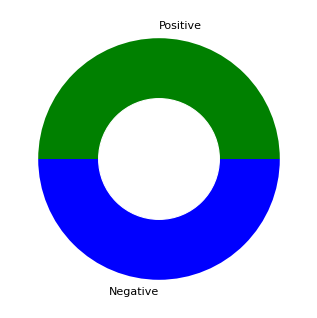

In [20]:
#create data for Pie Chart
plt.figure(figsize=(10, 5), dpi=80)
pichart = count_values_in_column(df,"Label")
names= ["Positive","Negative"]
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

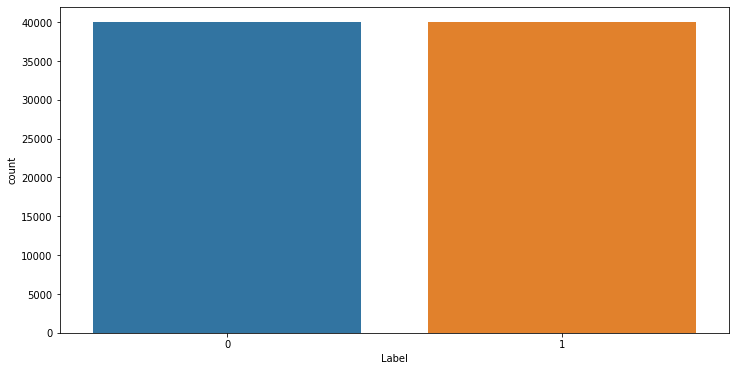

In [21]:
plt.figure(figsize=(12,6))#equal number of positive and negative tweets
sns.countplot(x='Label',data=df)

In [22]:
#calculating the no of words in each tweet
df["WordList"] = df["tweet"].str.split(' ')
df["WordCount"] =df["WordList"].str.len()
df.head()

Label                                              tweet  \
800000      1       I LOVE @Health4UandPets u guys r the best!!    
800001      1  im meeting up with one of my besties tonight! ...   
800002      1  @DaRealSunisaKim Thanks for the Twitter add, S...   
800003      1  Being sick can be really cheap when it hurts t...   
800004      1    @LovesBrooklyn2 he has that effect on everyone    

                                                 WordList  WordCount  
800000  [I, LOVE, @Health4UandPets, u, guys, r, the, b...          9  
800001  [im, meeting, up, with, one, of, my, besties, ...         15  
800002  [@DaRealSunisaKim, Thanks, for, the, Twitter, ...         28  
800003  [Being, sick, can, be, really, cheap, when, it...         22  
800004  [@LovesBrooklyn2, he, has, that, effect, on, e...          8

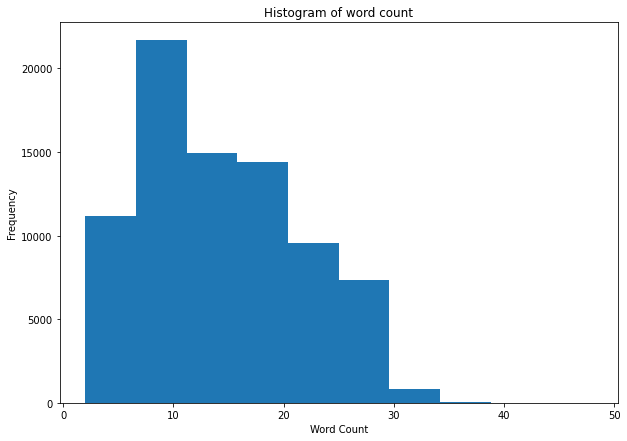

In [23]:
# Plot histogram of word counts
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df["WordCount"])

plt.title("Histogram of word count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
# Show plot
plt.show()

If we look at the above histogram plot, we can see that maximum utterances have word length from 0-10. Such analysis is useful in order to select maximum word length to create word vector. Based on the maximum word length, we can either truncate the longer utterance or pad the shorter utterance accordingly to create equal length vectors.

**Data Preprocessing**

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format. 

**Steps Involved in Data Preprocessing:**

•	Removed the null values as no models handle the NULL values on their own.

•	Performed the tokenization process on the text data, as this process will help us better understand the data to develop the model. Tokenization is the process of splitting raw data into a list of tokens.

•	Lemmatization process was performed on the tokenized data as it allows to map the multiple words to the common root words; as a result, the words are treated similarly.

•	The stop words were removed as these words repeatedly appear in the text however, they do not add much value to it. Removing them will shift the focus to more of unique data that holds significant information.

•	All the special characters/punctuation were removed in the preprocessing step, which is the important step in the data preprocessing, and a cleaner tweet was generated.

 

Tokenization Tokenization is the process of dividing text into a set of meaningful pieces. These pieces are called tokens. 
For example, we can divide a chunk of text into words, or we can divide it into sentences.

In [24]:
#Tokenization:
# The reduce_len parameter will allow a maximum of 3 consecutive repeating characters, while trimming the rest

tk = TweetTokenizer(reduce_len=True)

tweet = []
# Separating our features (text) and our labels into two lists to smoothen our work
A = df['tweet'].tolist()
B = df['Label'].tolist()
# Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text
# and its corresponding label
for a, b in zip(A, B):
    if b == 1:
        tweet.append((tk.tokenize(a), 1))
    else:
        tweet.append((tk.tokenize(a), 0))

tweet[:3]

[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  1),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  1),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  1)]

**Lemmatization**:Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.

In [25]:
def lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lem_sentence = []
     # First, we will convert the pos_tag output tags to a tag format that the WordNetLemmatizer can interpret
        # In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lem_sentence.append(lemmatizer.lemmatize(word, pos))
    return lem_sentence

**Stop words**:To remove the stopwords, we will use the Naural Language Tool Kit (NLTK) library. Firstly, we will divide our text data into words, compare them to list of stopwords available in the corpus module of this library and finally, remove them if it exists in the list.

In [26]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
stop_words = set(stopwords.words('english'))#removing the common words
print(stop_words)


{"you've", 'won', 'am', 'should', 'herself', 'again', 'same', 'he', 'where', 'those', 'with', "didn't", "doesn't", 'these', 'was', 'mightn', 'd', 'over', "won't", 'some', 'just', 's', 'itself', 'which', 'before', 'can', 'when', 'her', 'above', 'his', 'ain', "mightn't", 'had', 'does', 'is', 'why', 'now', 'an', 'on', 'as', 'yourselves', 'very', 'they', 'then', 'm', "shan't", 'a', 'him', 'against', 'yourself', "you'll", 'through', 'that', 'after', 'between', 'did', 'whom', 'who', 'me', "weren't", 'not', 'has', 'under', 'have', 'doesn', 'most', "that'll", 'ours', 'no', 'shan', 'my', "mustn't", 't', 'so', 'be', 'your', 'what', 'for', 've', 'mustn', 'to', 'were', 'having', 'both', 'them', 'don', 'yours', 'further', 'or', 'wouldn', "isn't", 'our', 'during', 'will', 'hers', 'below', 'themselves', 'isn', 'shouldn', 'each', 'until', 'she', 'ourselves', 'how', 'too', 'needn', 'at', "aren't", 'y', 'more', 'while', 'haven', "you're", 'theirs', 'aren', "shouldn't", 'about', 'wasn', 'off', "couldn't"

In [28]:
import re, string
import nltk

def noise_removal(tweet_tokens, stop_words = ()):

    cln_token = []

    for token, tag in nltk.pos_tag(tweet_tokens):
      # Eliminating the token if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
#Appneding  the token if its length is greater than zero, if it is not a punctuation or if it isnot a stopword
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cln_token.append(token.lower())
    return cln_token

noise_removal(tweet[1][0])

['im',
 'meet',
 'up',
 'with',
 'one',
 'of',
 'my',
 'besties',
 'tonight',
 'cant',
 'wait',
 'girl',
 'talk']

In [29]:
def list_to_dict(cleaned_tokens):#generating the clean tokens
    return dict([token, True] for token in cleaned_tokens)

cleantoken_list = []

for tokens, label in tweet:
    cleantoken_list.append((noise_removal(tokens), label))

cleantoken_list[1]

(['im',
  'meet',
  'up',
  'with',
  'one',
  'of',
  'my',
  'besties',
  'tonight',
  'cant',
  'wait',
  'girl',
  'talk'],
 1)

In [30]:
newdf= pd.DataFrame(cleantoken_list)#cleaned token list
newdf.columns=['cleantweet', 'Label']
newdf.head()

cleantweet  Label
0                    [i, love, u, guy, r, the, best]      1
1  [im, meet, up, with, one, of, my, besties, ton...      1
2  [thanks, for, the, twitter, add, sunisa, i, ge...      1
3  [being, sick, can, be, really, cheap, when, it...      1
4             [he, have, that, effect, on, everyone]      1

In [31]:
newdf['cleantweet'] =newdf['cleantweet'].apply(lambda x: ' '.join([w for w in x]))


In [32]:
newdf.head()#printing the preprocessed text

cleantweet  Label
0                            i love u guy r the best      1
1  im meet up with one of my besties tonight cant...      1
2  thanks for the twitter add sunisa i get to mee...      1
3  being sick can be really cheap when it hurt to...      1
4                    he have that effect on everyone      1

**Data Visualization**:A) Understanding the common words used in the tweets: WordCloud. A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

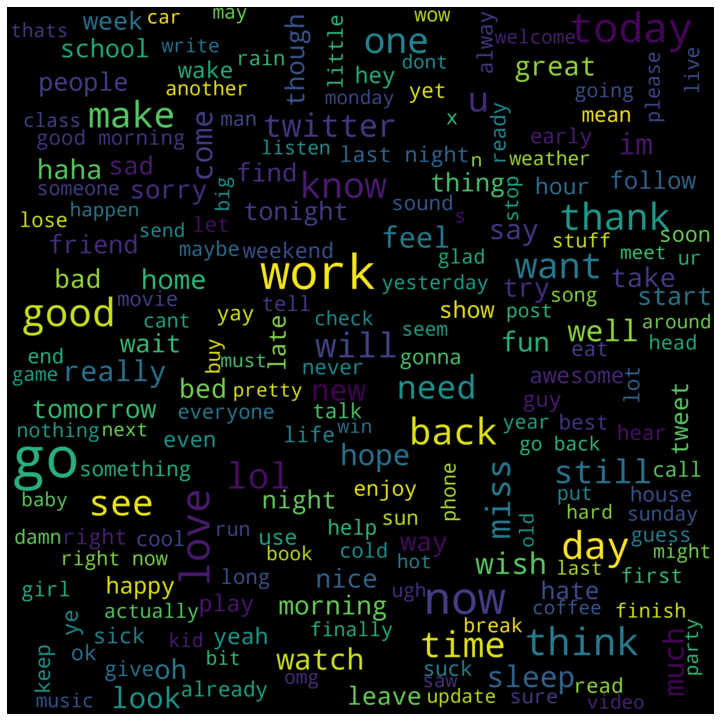

In [42]:
common_words = ' '.join([text for text in newdf['cleantweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=2500, height=2500, random_state=21, max_font_size=200).generate(common_words)
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Feature Extraction**:To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques as :
- Bag of Words
- TF-IDF
- Word Embeddings.

We can use Principal Component Analysis as the feature extraction method for the dimeonslaity reduction purpose

**TF-IDF Features**
The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.

TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

TF = (Number of times term t appears in a document)/(Number of terms in the document)
IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
TF-IDF = TF*IDF
In the code below, we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create feature vector. Words that occur less frequently are not very useful for classification




In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer


In [44]:
import pandas as pd
tfidf_vector_matrix = TfidfVectorizer(max_features=2500)#the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. 
#Words that occur less frequently are not very useful for classification
tfidf_features = tfidf_vector_matrix.fit_transform(newdf['cleantweet']).toarray()
tfidf_features.shape
print('number of uniqe words',tfidf_features.shape[1])
print('shape',tfidf_features.shape)
tfidf_data=pd.DataFrame(tfidf_features)
tfidf_data.head()



number of uniqe words 2500
shape (80000, 2500)


0     1     2     3     4     5     6     7     8     9     ...  2490  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   2491  2492  2493  2494  2495  2496  2497  2498  2499  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2500 columns]

**PCA**:
PCA is a method of obtaining important variables (in form of components) from a large set of variables available in a data set. It tends to find the direction of maximum variation (spread) in data. PCA is more useful when dealing with 3 or higher-dimensional data.

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(tfidf_features)

In [46]:
from sklearn.decomposition import PCA

# Create a PCA model with 1500 components: pca
pca = PCA(n_components=1000)

# Fit the PCA instance to the scaled samples
pca.fit(x_train)

# Transform the scaled samples: pca_features
pca_features = pca.transform(x_train )

# Print the shape of pca_features
print(pca_features.shape)
PCA_train=pd.DataFrame(pca_features)
#tfidf_train['target']=newdf['target']
PCA_train.head()

(80000, 1000)


0         1         2         3         4         5         6    \
0  1.523204 -0.334037 -1.287832  0.973111  2.083381  1.517204 -1.541089   
1 -0.057652  0.605933  0.254049  0.304762 -0.377224  0.838333  1.262386   
2  0.120488 -0.121586 -0.929471 -1.328301  0.341937  3.134700 -1.896831   
3 -0.208981  0.034036 -1.005254  1.529118  0.173046 -3.361112  1.465726   
4 -0.098878 -0.027612 -0.965626  0.398529  0.895030 -0.549756 -0.414655   

        7         8         9    ...       990       991       992       993  \
0  0.918664 -0.194264 -0.335808  ...  0.278538 -0.338508 -0.102614 -0.115943   
1  2.409148 -0.845311  0.221216  ...  0.766147 -0.593662  0.240333 -0.671765   
2 -0.549409  0.444592 -0.309606  ...  1.999764  0.043193  1.262387  1.351008   
3 -0.258325 -2.367041  0.553700  ...  0.733285 -0.144199 -1.143996  0.920794   
4 -0.541622  0.645010 -0.775743  ... -0.161602 -1.527501  2.721007 -0.014716   

        994       995       996       997       998       999  
0  0.424249  0.857732  0.282613  0.546251  0.721798 -0.081355  
1 -0.668440 -0.056201 -0.077415 -0.055060 -0.161660 -0.035947  
2  0.835640  1.214110  0.822207  1.502682  0.504011  0.909056  
3 -1.445358 -0.313330 -0.715746 -0.978751  0.922133 -1.133913  
4  0.454654 -0.218789  0.543385  0.361044  0.516386 -0.679759  

[5 rows x 1000 columns]

**Model Building And Evaluation**

**Model building with TF-DIF features for LogisticRegression**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# extract the labels from the train data
y = newdf.Label.values
# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(tfidf_features, y,test_size=0.3)
lreg = LogisticRegression() 
#training the model
lreg.fit(x_train, y_train) 

LogisticRegression()

**Model evaluation with TF-DIF features for LogisticRegression**

In [48]:
y_pred_LogisticRegression=lreg.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy score for LogisticRegression with TF-DIF feature is: ", accuracy_score(y_test,y_pred_LogisticRegression) * 100, '%')

Accuracy score for LogisticRegression with TF-DIF feature is:  77.05833333333332 %


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LogisticRegression))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     11991
           1       0.77      0.78      0.77     12009

    accuracy                           0.77     24000
   macro avg       0.77      0.77      0.77     24000
weighted avg       0.77      0.77      0.77     24000



Text(0.5, 1.0, 'Confusion Matrix')

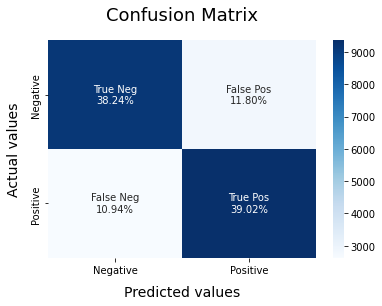

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_LogisticRegression)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Model building with PCA for LogisticRegression**

In [51]:
from sklearn.model_selection import train_test_split
# extract the labels from the train data
y = df.Label.values
# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(pca_features, y,test_size=0.3)
lreg = LogisticRegression() 
#training the model
lreg.fit(x_train, y_train) 

LogisticRegression()

**Model evaluation with PCA for LogisticRegressionModel**

In [54]:
y_pred_LogisticRegression_PCA=lreg.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy score for LogisticRegression with TF-DIF feature is: ", accuracy_score(y_test,y_pred_LogisticRegression_PCA) * 100, '%')

Accuracy score for LogisticRegression with TF-DIF feature is:  74.75 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LogisticRegression_PCA))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74     11892
           1       0.75      0.75      0.75     12108

    accuracy                           0.75     24000
   macro avg       0.75      0.75      0.75     24000
weighted avg       0.75      0.75      0.75     24000



Text(0.5, 1.0, 'Confusion Matrix')

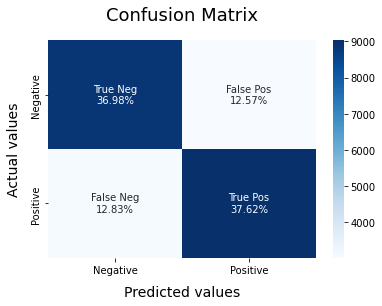

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_LogisticRegression_PCA)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Model building with TF-DIF features for Bernoulli Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB 
# extract the labels from the train data
y = df.Label.values
# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(tfidf_features, y,test_size=0.3)
classifier = BernoulliNB()  
classifier.fit(x_train, y_train)  #training the model
 

BernoulliNB()

**Model evaluation with TF-DIF features for Bernoulli Naive Bayes**

In [ ]:
y_pred_naive_bayes=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for LogisticRegression with TF-DIF feature is: ", accuracy_score(y_test,y_pred_naive_bayes) * 100, '%')

Accuracy score for LogisticRegression with TF-DIF feature is:  75.9375 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_naive_bayes))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75     11976
           1       0.75      0.78      0.76     12024

    accuracy                           0.76     24000
   macro avg       0.76      0.76      0.76     24000
weighted avg       0.76      0.76      0.76     24000



Text(0.5, 1.0, 'Confusion Matrix')

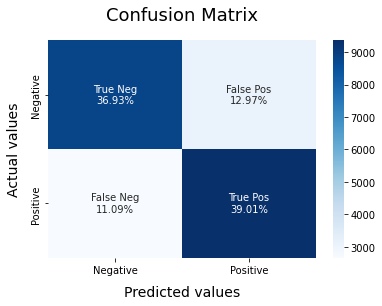

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_naive_bayes)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Model building with PCA for  Bernoulli Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB 
# extract the labels from the train data
y = df.Label.values
# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(pca_features, y,test_size=0.3)
classifier = BernoulliNB()  
classifier.fit(x_train, y_train)  #training the model
 

BernoulliNB()

**Model evaluation with PCA for Bernoulli Naive Bayes**

In [ ]:
y_pred_naive_bayes_PCA=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for LogisticRegression with BernoulliNB  is: ", accuracy_score(y_test,y_pred_naive_bayes_PCA) * 100, '%')

Accuracy score for LogisticRegression with BernoulliNB  is:  69.075 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_naive_bayes_PCA))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69     12050
           1       0.69      0.68      0.69     11950

    accuracy                           0.69     24000
   macro avg       0.69      0.69      0.69     24000
weighted avg       0.69      0.69      0.69     24000



Text(0.5, 1.0, 'Confusion Matrix')

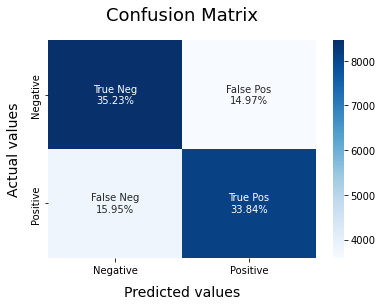

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_naive_bayes_PCA)
categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Model building with TF-DIF features for RandomForestClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# extract the labels from the train data
y = df.Label.values
# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(tfidf_features, y,test_size=0.3) 
rfc = RandomForestClassifier(n_estimators=100,random_state=0)#used 100 decision tree to build the model
rfc.fit(x_train, y_train)  #training the model

RandomForestClassifier(random_state=0)

**Model evaluation with TF-DIF features for RandomForestClassifier**

In [ ]:
y_pred_random=rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for Random forest classifier with TF-DIF feature is: ", accuracy_score(y_test,y_pred_random) * 100, '%')

Accuracy score for Random forest classifier with TF-DIF feature is:  75.64166666666667 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     12000
           1       0.76      0.74      0.75     12000

    accuracy                           0.75     24000
   macro avg       0.75      0.75      0.75     24000
weighted avg       0.75      0.75      0.75     24000



Text(0.5, 1.0, 'Confusion Matrix')

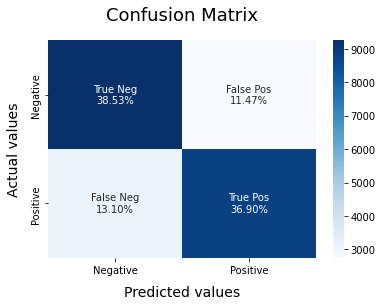

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_random)
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**Model building with PCA for RandomForestClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# extract the labels from the train data
y = df.Label.values
# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(pca_features, y,test_size=0.3) 
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(x_train, y_train)  #training the model

RandomForestClassifier(random_state=0)

**Model evaluation with PCA for RandomForestClassifier**

In [ ]:
y_pred_random_PCA=rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score for Random forest classifier with PCA is: ", accuracy_score(y_test,y_pred_random_PCA) * 100, '%')

Accuracy score for Random forest classifier with PCA is:  69.24166666666667 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_random_PCA))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70     11956
           1       0.70      0.67      0.69     12044

    accuracy                           0.69     24000
   macro avg       0.69      0.69      0.69     24000
weighted avg       0.69      0.69      0.69     24000



Text(0.5, 1.0, 'Confusion Matrix')

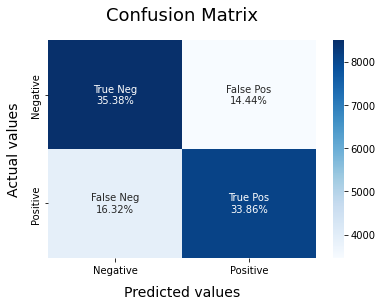

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_random_PCA)
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

**From the above analysis, we can see that using PCA has decreased our accuracy as we loose some information while applying the dimenonsality reduction. However,the computation time is reduced**